In [5]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# modifying code given in class
def smith_waterman(seq1, seq2, match, gap_penalty, mismatch_penalty):
    # initialize grid
    data = np.zeros((len(seq1), len(seq2)))
    # enumerate over sequences
    for i, base1 in enumerate(seq1):
        # store max length and coordinates
        max_len = 1
        max_i = 0
        max_j = 0
        for j, base2 in enumerate(seq2):
            # if the two chars are identical
            if base1 == base2:
                # if square is already filled in due to gaps in previous enumerations
                # keep the larger number
                # this also takes care of the horizontal gap scenario
                # because every char in seq1 are compared with all chars in seq2 sequentially
                # and max match length is taken
                # data[i, j] = current square
                # data[i-1, j-1] + 1 = diagonally before
                # data[i-1, j-2[ = horizontal gap (down 1, right 2)
                if i > 0 and j > 0:
                    data[i,j] = max(data[i,j], data[i-1,j-1] + 1)
                if i > 0 and j > 1:
                    data[i,j] = max(data[i,j], data[i-1,j-1] + 1, data[i-1, j-2]+1)
            # if there is a gap vertically
            elif i < len(seq1)-1:
                if seq1[i+1] == base2:
                    if i > 0 and j > 0:
                        # take maximum between its current value and (1 + (value at up 2, left 1))
                        data[i+1,j] = max(data[i+1,j], data[i-1,j-1]+1)
                    else:
                        data[i+1,j] += 1
            # update longest sequence
            if data[i,j] > max_len:
                max_len = data[i,j]
                max_i = i
                max_j = j
                print(max_len)
    print(max_len, "s1", seq1[max_i], "s2", seq2[max_j])
    print("[", max_i,",", max_j,"]")
    # plot graph
    plt.xticks(range(len(seq2)), labels=seq2)
    plt.yticks(range(len(seq1)), labels=seq1)
    plt.imshow(data, interpolation='nearest',
               cmap='binary')
    plt.gca().xaxis.tick_top()

2.0
2.0
3.0
2.0
4.0
3.0
4.0
3.0
4.0
5.0
5.0
2.0
6.0
2.0
7.0
2.0
8.0
3.0
8.0
4.0
5.0
2.0
6.0
2.0
7.0
3.0
8.0
3.0
4.0
4.0 s1 C s2 C
[ 17 , 5 ]


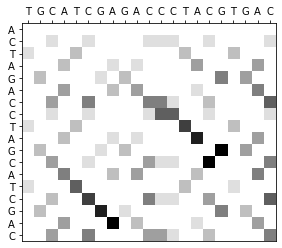

In [54]:
# test function
smith_waterman('ACTAGACCTAGCATCGAC', 'TGCATCGAGACCCTACGTGAC', 1, 1, 1)
plt.show()